<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/Neural_Nets_With_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classifier Using the Keras Sequential API

Importing TensorFlow and other libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Loading the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Data Preprocessing

In [3]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

Splitting data into training, validation, and test sets

In [4]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Class names for Fashion MNIST

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Building the Sequential Model

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model summary

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

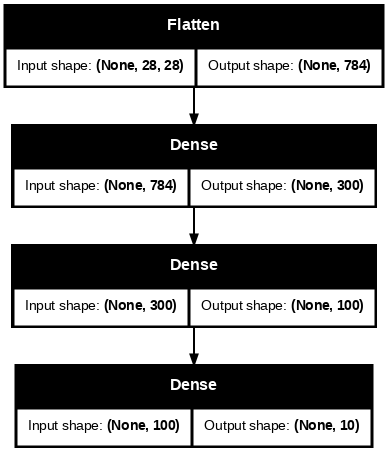

In [8]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True, dpi=72)

In [9]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name)
weights, biases = hidden1.get_weights()

Compiling the Model

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Training

In [11]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6865 - loss: 1.0067 - val_accuracy: 0.8244 - val_loss: 0.5198
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8258 - loss: 0.5051 - val_accuracy: 0.8498 - val_loss: 0.4496
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8425 - loss: 0.4540 - val_accuracy: 0.8530 - val_loss: 0.4259
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8487 - loss: 0.4285 - val_accuracy: 0.8616 - val_loss: 0.3918
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8592 - loss: 0.4030 - val_accuracy: 0.8472 - val_loss: 0.4199
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8661 - loss: 0.3811 - val_accuracy: 0.8734 - val_loss: 0.3684
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8712 - loss: 0.3620 - val_accuracy: 0.8716 - val_loss: 0.3688
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8756 - loss: 0.3

Plotting Learning Curves

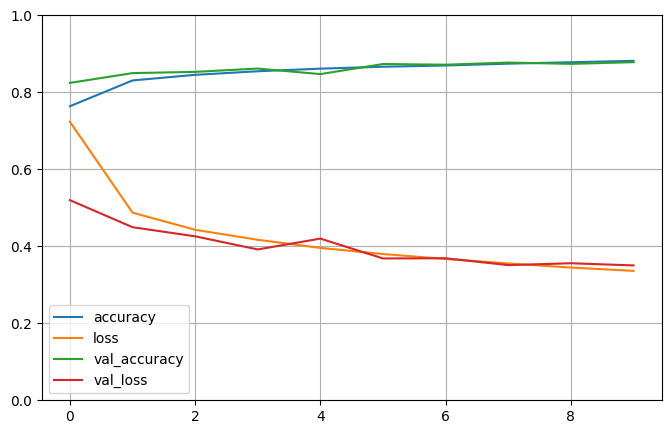

In [12]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Evaluate

In [13]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8644 - loss: 0.3833


[0.3857099711894989, 0.8619999885559082]

Making Predictions

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

y_pred = np.argmax(y_proba, axis=1) # Alternative to model.predict_classes()
y_pred
np.array(class_names)[y_pred]
y_new = y_test[:3]
y_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([9, 2, 1], dtype=uint8)

Complex Models Using the Keras Functional API or the Subclassing API

Functional API

In [15]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
flatten = keras.layers.Flatten()(concat) # Add a Flatten layer
output = keras.layers.Dense(10, activation="softmax")(flatten) # Connect to the flattened output
model_functional = keras.models.Model(inputs=[input_], outputs=[output])

In [16]:
model_functional.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 28, 300)   │      8,700 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 28, 100)   │     30,100 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 128)   │          0 │ input_layer_1[0]… │
│ (Concatenate)       │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 3584)      │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 10)        │     35,850 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 74,650 (291.60 KB)

 Trainable params: 74,650 (291.60 KB)

 Non-trainable params: 0 (0.00 B)

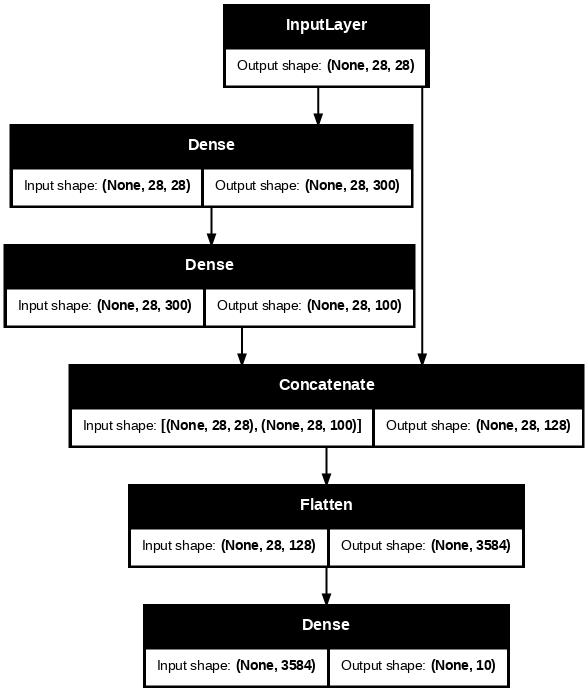

In [17]:
keras.utils.plot_model(model_functional, "my_complex_model.png", show_shapes=True, dpi=72)

In [18]:
model_functional.compile(loss="sparse_categorical_crossentropy",
                         optimizer="sgd",
                         metrics=["accuracy"])

history_functional = model_functional.fit(X_train, y_train, epochs=10,
                                          validation_data=(X_valid, y_valid))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_5']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.6950 - loss: 1.0002 - val_accuracy: 0.8210 - val_loss: 0.5400
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8159 - loss: 0.5307 - val_accuracy: 0.8396 - val_loss: 0.4754
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - accuracy: 0.8362 - loss: 0.4730 - val_accuracy: 0.8512 - val_loss: 0.4434
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.8432 - loss: 0.4579 - val_accuracy: 0.8560 - val_loss: 0.4297
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8475 - loss: 0.4362 - val_accuracy: 0.8598 - val_loss: 0.4235
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8527 - loss: 0.4238 - val_accuracy: 0.8652 - val_loss: 0.4061
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - accuracy: 0.8586 - loss: 0.4048 - val_accuracy: 0.8632 - val_loss: 0.4027
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.8647 - loss: 0.39

Model with multiple inputs

In [19]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model_multi_input = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model_multi_input.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

Model with multiple outputs

In [20]:
input_A = keras.layers.Input(shape=[6], name="input_A")
input_B = keras.layers.Input(shape=[8], name="input_B")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output_main = keras.layers.Dense(1, name="main_output")(concat)
output_aux = keras.layers.Dense(1, name="aux_output")(hidden2)

model_multi_output = keras.models.Model(inputs=[input_A, input_B],
                                         outputs=[output_main, output_aux])

model_multi_output.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Subclassing API

In [21]:
class MySequentialModel(keras.models.Sequential):
    def call(self, inputs):
        return super().call(inputs)

class MyModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.dense1 = keras.layers.Dense(units, activation=activation)
        self.dense2 = keras.layers.Dense(units, activation=activation)
        self.dense3 = keras.layers.Dense(10, activation="softmax")

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

Saving and Restoring Models

In [22]:
model.save("my_keras_model.h5")
model_loaded = keras.models.load_model("my_keras_model.h5")

Using Callbacks During Training

Model Checkpointing and Early Stopping

In [23]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_callbacks = model.fit(X_train, y_train, epochs=50,
                              validation_data=(X_valid, y_valid),
                              callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1707/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8841 - loss: 0.3263

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8841 - loss: 0.3263 - val_accuracy: 0.8786 - val_loss: 0.3376
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8867 - loss: 0.3175 - val_accuracy: 0.8818 - val_loss: 0.3389
Epoch 3/50
1718/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8919 - loss: 0.3051

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8919 - loss: 0.3051 - val_accuracy: 0.8806 - val_loss: 0.3312
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8905 - loss: 0.3023 - val_accuracy: 0.8736 - val_loss: 0.3546
Epoch 5/50
1717/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8940 - loss: 0.2956

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8940 - loss: 0.2956 - val_accuracy: 0.8800 - val_loss: 0.3259
Epoch 6/50
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8974 - loss: 0.2902

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8974 - loss: 0.2902 - val_accuracy: 0.8878 - val_loss: 0.3110
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8972 - loss: 0.2868 - val_accuracy: 0.8792 - val_loss: 0.3302
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9005 - loss: 0.2751 - val_accuracy: 0.8908 - val_loss: 0.3124
Epoch 9/50
1717/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9005 - loss: 0.2778

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9005 - loss: 0.2778 - val_accuracy: 0.8916 - val_loss: 0.3008
Epoch 10/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9022 - loss: 0.2685 - val_accuracy: 0.8860 - val_loss: 0.3188
Epoch 11/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9043 - loss: 0.2638 - val_accuracy: 0.8896 - val_loss: 0.3053
Epoch 12/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9074 - loss: 0.2548 - val_accuracy: 0.8874 - val_loss: 0.3091
Epoch 13/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9090 - loss: 0.2530 - val_accuracy: 0.8856 - val_loss: 0.3148
Epoch 14/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9112 - loss: 0.2497 - val_accuracy: 0.8924 - val_loss: 0.3009
Epoch 15/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9119 - loss: 0.2429 - val_accuracy: 0.8902 - val_loss: 0.3033
Epoch 16/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9127 - loss: 0.2432 - v

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9181 - loss: 0.2282 - val_accuracy: 0.8890 - val_loss: 0.2983
Epoch 19/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9174 - loss: 0.2279 - val_accuracy: 0.8924 - val_loss: 0.3008
Epoch 20/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9185 - loss: 0.2260 - val_accuracy: 0.8926 - val_loss: 0.3069
Epoch 21/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9212 - loss: 0.2186 - val_accuracy: 0.8898 - val_loss: 0.3104
Epoch 22/50
1710/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9239 - loss: 0.2130

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9238 - loss: 0.2130 - val_accuracy: 0.8944 - val_loss: 0.2910
Epoch 23/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9205 - loss: 0.2177 - val_accuracy: 0.8928 - val_loss: 0.2969
Epoch 24/50
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9239 - loss: 0.2126

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9239 - loss: 0.2126 - val_accuracy: 0.8936 - val_loss: 0.2905
Epoch 25/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9266 - loss: 0.2068 - val_accuracy: 0.8902 - val_loss: 0.3085
Epoch 26/50
1712/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9269 - loss: 0.2039

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9269 - loss: 0.2039 - val_accuracy: 0.8968 - val_loss: 0.2881
Epoch 27/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9288 - loss: 0.1987 - val_accuracy: 0.8854 - val_loss: 0.3224
Epoch 28/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9298 - loss: 0.1993 - val_accuracy: 0.8914 - val_loss: 0.3072
Epoch 29/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9309 - loss: 0.1910 - val_accuracy: 0.8968 - val_loss: 0.2950
Epoch 30/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9326 - loss: 0.1872 - val_accuracy: 0.8966 - val_loss: 0.2971
Epoch 31/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9344 - loss: 0.1867 - val_accuracy: 0.8970 - val_loss: 0.2957
Epoch 32/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9358 - loss: 0.1798 - val_accuracy: 0.8924 - val_loss: 0.3108
Epoch 33/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9367 - loss: 0.1791 

TensorBoard

In [24]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [25]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history_tensorboard = model.fit(X_train, y_train, epochs=10,
                                validation_data=(X_valid, y_valid),
                                callbacks=[tensorboard_cb])

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9303 - loss: 0.1960 - val_accuracy: 0.8918 - val_loss: 0.3003
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9294 - loss: 0.1983 - val_accuracy: 0.8980 - val_loss: 0.2901
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9310 - loss: 0.1948 - val_accuracy: 0.8966 - val_loss: 0.3057
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9325 - loss: 0.1885 - val_accuracy: 0.8964 - val_loss: 0.2869
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9357 - loss: 0.1836 - val_accuracy: 0.8916 - val_loss: 0.2942
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9350 - loss: 0.1834 - val_accuracy: 0.8940 - val_loss: 0.3001
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9362 - loss: 0.1779 - val_accuracy: 0.8960 - val_loss: 0.2967
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9363 - loss: 0.1

Fine-Tuning Neural Network Hyperparameters

Using GridSearchCV with Keras models

In [26]:
!pip install scikeras

In [27]:
from scikeras.wrappers import KerasClassifier

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

keras_clf = KerasClassifier(model=build_model,verbose=1)